In [1]:
import sys
sys.path.append('..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
strategyname = 'strategy_270225'
d, info = matlab.loaddata('../mat/'+strategyname+'.mat')

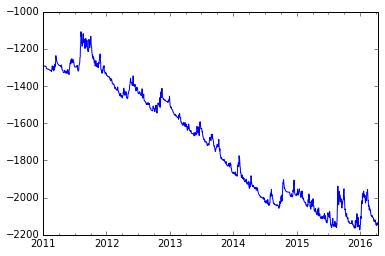

In [4]:
d.exo.plot();

In [5]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

<h1>Simple entry and exit rules based on MA crossing</h1>

In [6]:
slow_ma = pd.rolling_mean(d.exo, 50)
fast_ma = pd.rolling_mean(d.exo, 20)

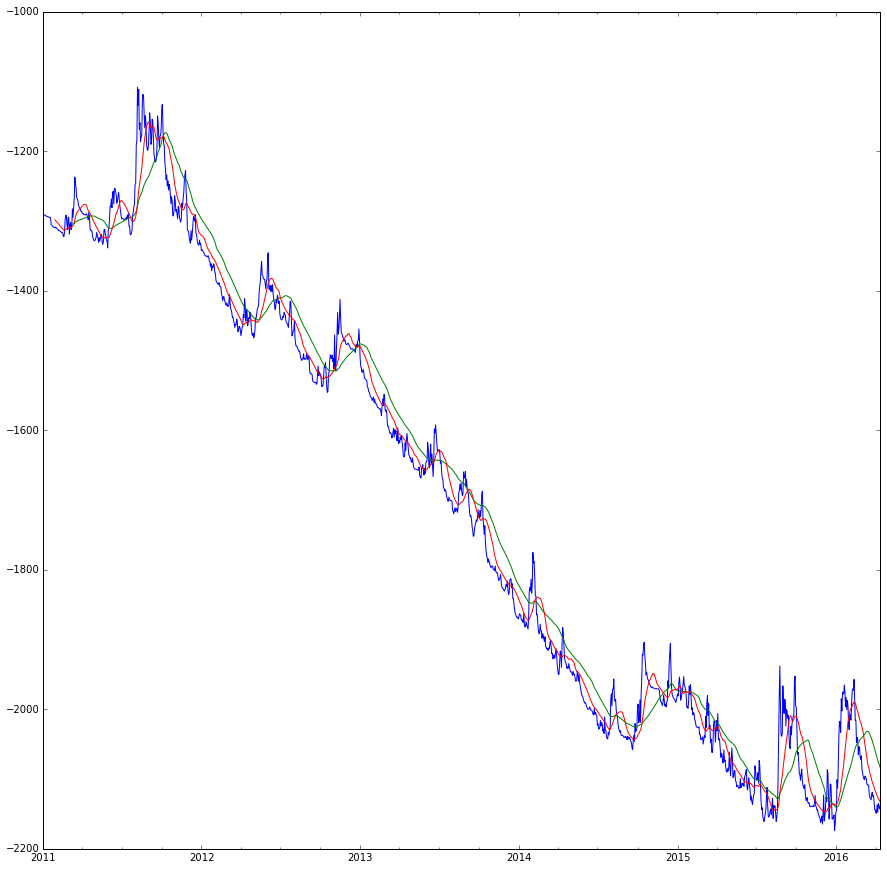

In [7]:
figsize(15, 15)
d.exo.plot()
slow_ma.plot(c='r')
fast_ma.plot(c='g')

# Entry rules

* Enter short when fast MA crosses down slow MA
* Exit when fast MA crosses up slow MA


In [8]:
short_entry = CrossDown(fast_ma, slow_ma)
short_exit = CrossUp(fast_ma, slow_ma)

<h1>Backtest results</h2>

In [9]:
direction = -1
pl, inposition = backtester.backtest(d, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

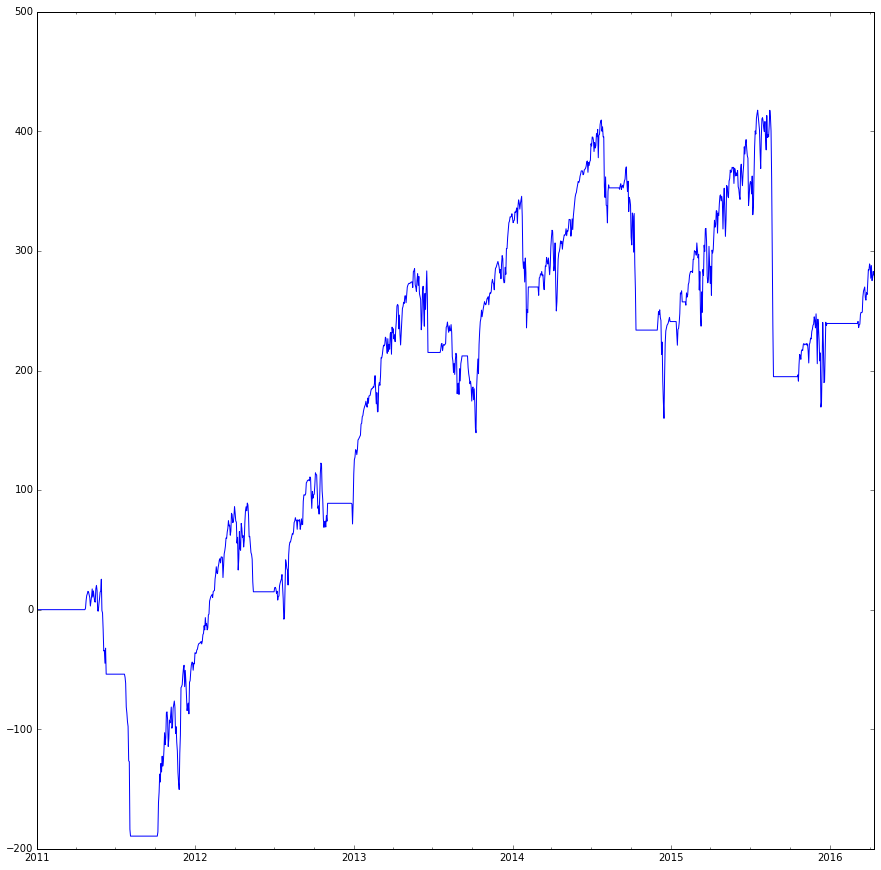

In [10]:
equity.plot()

In [11]:
stats

{'avg': 18.411538461538438,
 'count': 13,
 'maxdd': -249.49999999999977,
 'netprofit': 239.34999999999968,
 'std': 92.223462211351233,
 'winrate': 0.6153846153846154}

In [12]:

date = pl.index
export_dict = {
    'pl': pl,
    'inposition': inposition,    
}

matlab.exportdata('../mat/out/'+strategyname+'_out.mat', date, export_dict)

In [14]:
inposition

2011-01-03    0
2011-01-04    0
2011-01-05    0
2011-01-06    0
2011-01-07    0
2011-01-10    0
2011-01-11    0
2011-01-12    0
2011-01-13    0
2011-01-14    0
2011-01-17    0
2011-01-18    0
2011-01-19    0
2011-01-20    0
2011-01-21    0
2011-01-24    0
2011-01-25    0
2011-01-26    0
2011-01-27    0
2011-01-28    0
2011-01-31    0
2011-02-01    0
2011-02-02    0
2011-02-03    0
2011-02-04    0
2011-02-07    0
2011-02-08    0
2011-02-09    0
2011-02-10    0
2011-02-11    0
             ..
2016-03-02    0
2016-03-03    0
2016-03-04    1
2016-03-07    1
2016-03-08    1
2016-03-09    1
2016-03-10    1
2016-03-11    1
2016-03-14    1
2016-03-15    1
2016-03-16    1
2016-03-17    1
2016-03-18    1
2016-03-21    1
2016-03-22    1
2016-03-23    1
2016-03-24    1
2016-03-25    1
2016-03-28    1
2016-03-29    1
2016-03-30    1
2016-03-31    1
2016-04-01    1
2016-04-04    1
2016-04-05    1
2016-04-06    1
2016-04-07    1
2016-04-08    1
2016-04-11    1
2016-04-12    1
dtype: float64